# seaborn: statistical data visualization
## Plotting with categorical data

Hi Guys,<br>
Welcome back to the seaborn: A statistical data visualization section. Let's deal with the categorical data in this section. Seaborn provides range of options to plot categorical data. Seaborn, on its website in [categorical data plotting section](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial), divide categorical plots into three groups:
* <code>swarmplot()</code> and <code>stripplot()</code> are those that show each observation at each level of the categorical variable. 
* <code>boxplot()</code> and <code>violinplot()</code> are those that show an abstract representation of each distribution of observations.  
* <code>barplot()</code> and <code>pointplot()</code> are those that apply a statistical estimation to show a measure of central tendency and confidence interval.

Along with above mentiond types of categorical plots, we will also discuss widely used categorical plots, such as <code>countplot()</code> and <code>factorplot()</code> in this section. 

Let's start with examples:

In [1]:
# import seaborn library and load the dataset 'tips'
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')

In [2]:
# once again checking the head of the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Categorical scatterplots: 
### <code>stripplot()</code>
<code>stripplot()</code> provides a simple way to show the values of some quantitative variable across the level of a categorical variable.
It draws a scatterplot where one variable is categorical.<br>

Let's plot the total_bill for each day in the week in our tips data to see how the <code>stripplot()</code> works!

<AxesSubplot:xlabel='day', ylabel='total_bill'>

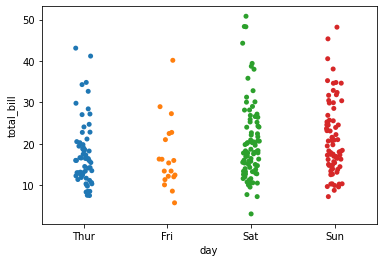

In [3]:
sns.stripplot(x="day", y="total_bill",data=tips)

In the above strip plot, we see that the datapoints are overlap, which is common and makes it difficult to observe the full distribution of data.<br>
* A parameter** ``jitter`` ** is usefull and provides easy solution to this overlap issue by adjusting the position of datapoitns along categorical axis, so that it is easier to see the distribution. <br>
* We can specify the amount of ** ``jitter`` ** ( such as, half the width of the uniform random variable support), or just use ** ``True`` **for a good default.

Let's have a look of the same plot by introducing some random ** ``jitter`` **:<br>
Let's add a ** nested categorical variable, ``Sex``** with the ** ``hue``** parameter, to get better understanding of our data. We can introduce ** ``palette``** of our own choice, e.g. coolwarm, rainbow etc. 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

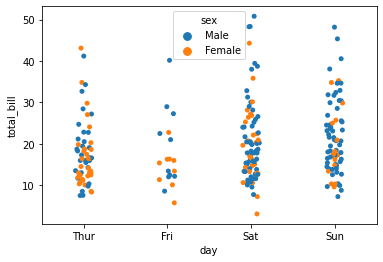

In [4]:
sns.stripplot(x="day", y="total_bill",data=tips,
              jitter=True,
              hue="sex")#, palette='coolwarm')

### <code>swarmplot()</code>

<code>swarmplot()</code> is similar to the <code>stripplot()</code> and uses different approach to avoid the overlapping issue in the datapoints by positioning each scatterplot point on the categorical axis with an algorithm that avoids overlapping points. This gives a better representation of the distribution of values.<br> 
&#9758; <font style="font-size:12px;color:green;">The <code>swarmplot()</code> does not scale well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).</font>

Let's re-plot the above data with <code>swarmplot()</code>.<br>
&#9758; we don't need `jitter` anymore in <code>swarmplot()</code>: 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

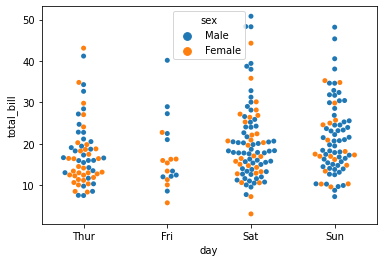

In [5]:
sns.swarmplot(x="day", y="total_bill",data=tips,
              hue="sex")#,palette='coolwarm')

A common, and often helpful, practice is to put the categorical variable on the vertical axis. This is particularly useful when the category names are relatively long or there are many categories. Although, we can use <code> orient : "v" | "h", optional parameter </code>, but usually plot orientation can be inferred from the datatypes of the variables passed to x and/or y.<br>
Let's try plotting **`days`** along **`y`** and **`total_bill`** along **`x`** with **`hue = 'time'`**.

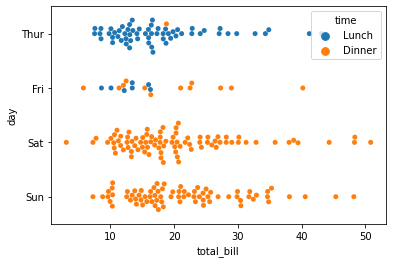

In [6]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

We can **observe from the plot above**:
* almost all the customers come for lunch on Thursday
* almost all the customers come for dinner on the weekends

On Fridays, not many go out for lunch or dinner, they may want to save money and energy for the weekends!

### Distributions of observations within categories:
### <code>boxplot()</code>
These type of plots are used to show the distribution of categorical data. A box plot (also known as a box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. <br>

Let's learn with example using out tips data:

*<font style="font-size:11px;color:green;">The box shows the [quartiles](https://en.wikipedia.org/wiki/Quartile) of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.<br>
In statistics, the quartiles of a ranked set of data values are the three points that divide the data set into four equal groups, each group comprising a quarter of the data. A quartile is a type of quantile. The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. The second quartile (Q2) is the median of the data. The third quartile (Q3) is the middle value between the median and the highest value of the data set.<font>*

<AxesSubplot:xlabel='day', ylabel='total_bill'>

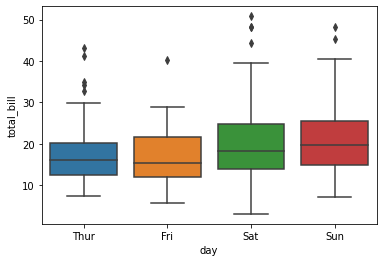

In [7]:
sns.boxplot(x="day", y="total_bill", data=tips)#,palette='rainbow')

&#9758; Understanding the Box Plot:<br>
We have total_bill along Y and category 'day' along X. <br>
If we look at any one of the box, we see the data points in each box / box-and-whisker plot are divided into four quartile groups :<br>
* Quartile group 1 - Q1: between the bottom whisker and the bottom of the box
* Quartile group 2 - Q2: between the bottom of the box to the line in the box (median)
* Quartile group 3 - Q3: between the median and the upper end of the box
* Quartile group 4 - Q4: between upper end of the box and the upper whisker

Points outside the quartiles are outliers.

Let's introduce <code>hue = smoker or sex</code> to get more information from our data. 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

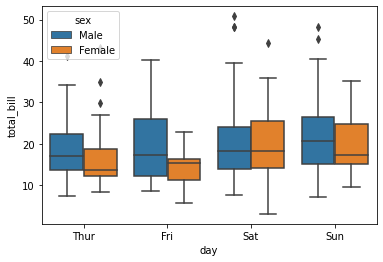

In [8]:
sns.boxplot(x="day", y="total_bill", data=tips,
           hue = 'sex')#,palette='rainbow')
# try hue = 'smoker'

In the plot above, we split the data into two boxes for each day based on their sex or smoking habit in different color. Now we can compare daily behavior of the person along with other category sex or smoking.<br>
This is a true power of seaborn which quickly allow us to add another layer using hue parameter and provide in-depth information from our data very quickly and smoothly.

### <code>violinplot()</code>
The <code>violinplot()</code> draw a combination of boxplot and kernel density estimate. <br>

A violin plot plays a similar role as a box and whisker plot. <br>
Let's plot the data to learn!

<AxesSubplot:xlabel='day', ylabel='total_bill'>

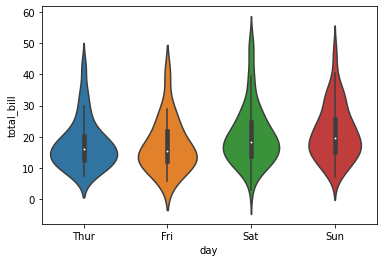

In [9]:
sns.violinplot(x="day", y="total_bill", data=tips)

So, we have a box plot on top of the violinplot. Unlikely the box plot, the violin plot allows us to actually plot all the components that corresponds to actual data points. The violin plot is essentially showing the kernel density estimation of the underlying distribution.<br>

&#9989; As compare to the box plots, which is very easy to read, the violin plots are little harder to interpret. They give a lot more information as fas as the distribution of all the points themselves is concerned, but on the cost of more time to looking and understanding the violin plot. *Before presenting such plots, you need to understand your audience as they may want the information in simpler way.*<br>

We can introduce ``hue`` parameter in violin plot as well. Along with ``hue``, its very convenient to use ``split = True``. Rather than set of violins plots, next to each other for a nested categorical variable, this will draw half of a violin for each level that can make it easier to directly compare the distributions in nested categorical variable, e.g. ``sex``, ``smoker`` in this case.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

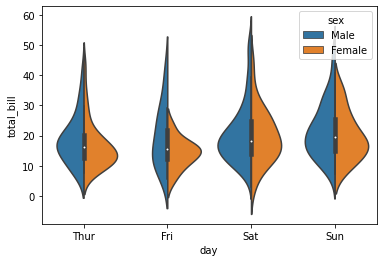

In [10]:
sns.violinplot(x="day", y="total_bill",data=tips,
               hue='sex', split=True)

In the plot above, the blue and green distributions are splitted in half of the each violin for male and female. Now we can directly compare the distributions the nested categorical variable ``sex`` for male and female.<br>
&#9989; Once again, violin plots give lots of information and comes at the cost of spending more time for understanding and presenting to others, based on your audience.<br>
* If you are dealing with more technical people, like data scientists etc, they may have used violin plots and this is a great choice to use while presenting the data. <br>
* If you are dealing with more executive people like, CEO or investors, you better use the box plot, which is the more popular and commonly used for data interpretation. Only use violin plot if you find something very interesting using this type of the plot. 

**Remember, understand your audience!**

### Statistical estimation within categories:
Often, rather than showing the distribution within each category, you might want to show the [central tendency](https://en.wikipedia.org/wiki/Central_tendency) of the values. Seaborn provides elegant ways to show such information using its buit-in functions:
### <code>barplot()</code>

<code>barplot()</code> is a general plot that allows us to aggregate the categorical data based off some function, by default the mean. <br>
For example:

*<font style="font-size:11px;color:green;">Measures of central tendency are often called averages. The term central tendency dates from the late 1920s. The most common measures of central tendency are the arithmetic mean, the median and the mode.</font>*

<AxesSubplot:xlabel='day', ylabel='total_bill'>

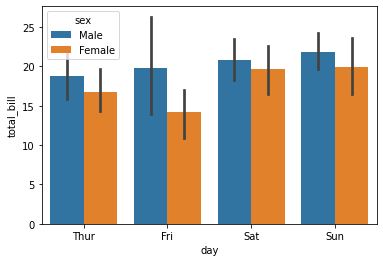

In [11]:
#sns.barplot(x='sex', y='total_bill',data=tips)
sns.barplot(x="day", y="total_bill", hue="sex",data=tips)

Along Y, we get the mean of total_bill paid by male in blue bar and by female in green bar.<br>
We can change the estimator object to our own function, let's say we want to use the standard deviation as our estimator for gender on each day in the week. We can use numpy.std for this purpose. *We can use our own customized function as an estimator as well. *<br>
Let's see, which gender have more variance in the total_bill on each day. 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

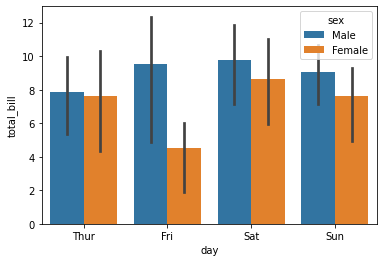

In [12]:
import numpy as np
#sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)
sns.barplot(x="day", y="total_bill", data=tips, hue="sex",estimator=np.std)

### <code>countplot()</code>

A special case for the bar plot is when we want to show the number of observations in each category rather than computing a statistic for a second variable, such as mean, std etc. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the <code>countplot()</code> function.<br>

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='day', ylabel='count'>

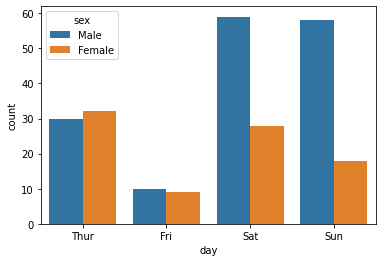

In [13]:
sns.countplot(x="day", hue="sex",data=tips)

In the plot above, no of observations in nested category "sex" on each day of the week is along Y. 

<AxesSubplot:xlabel='size', ylabel='count'>

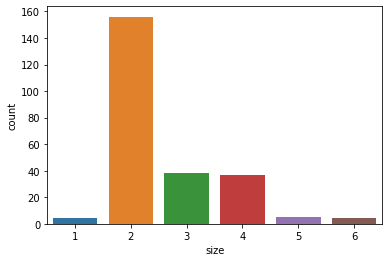

In [14]:
# another example using size in the data
sns.countplot(x="size",data=tips)
# group of 2 is the most common!
#sns.countplot(x='size',hue='day',data=tips) # try this line of code

### <code>pointplot()</code>
An alternative style for visualizing the same information, as of using bar plot, is offered by the <code>pointplot()</code> function. Rather than showing a full bar (using barplot) it just plots the point estimate and confidence interval.<br>

Additionally:
* pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because our eyes are quite good at picking up on differences of slopes:

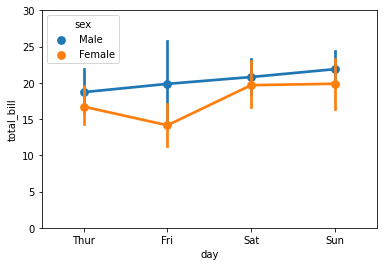

In [15]:
sns.pointplot(x="day", y="total_bill", hue="sex",data=tips)
# Let's rescale y to compare in the next figure
import matplotlib.pyplot as plt
plt.ylim(0,30);

### Combining Categorical Plots:

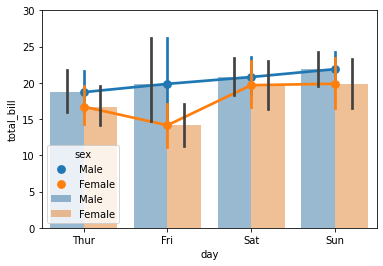

In [16]:
# Let's put barplot on top of pointplot to compare
sns.pointplot(x="day", y="total_bill", hue="sex",data=tips)
sns.barplot(x="day", y="total_bill", hue="sex",data=tips, alpha=0.5)
plt.ylim(0,30);

<AxesSubplot:xlabel='day', ylabel='tip'>

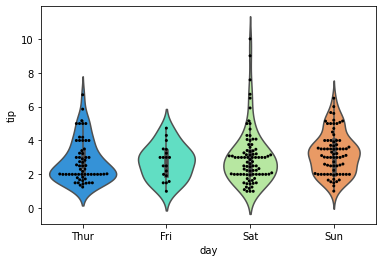

In [17]:
# How much in tip on each day
sns.violinplot(x="day", y="tip", data=tips, palette="rainbow")
sns.swarmplot(x="day", y="tip", data=tips, color="black",size=3)

### Drawing multi-panel categorical plots:
### <code>factorplot()</code>
<code>factorplot()</code> is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


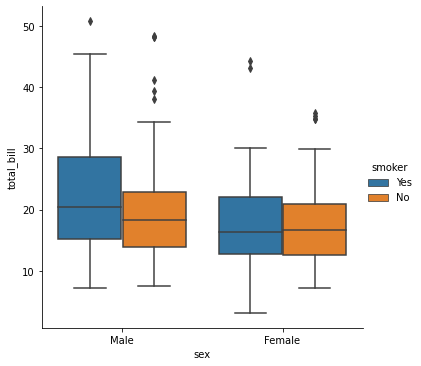

In [18]:
sns.factorplot(x="sex",y="total_bill",data=tips,
               hue='smoker',kind="box")
# change the kind to violin, bar etc

The main advantage of using a <code>factorplot()</code> is that it is very easy to “facet” the plot and investigate the role of other categorical variables.<br>
Let's try with examples:

We can use **`col = time`** to plot all the nested categorical values in time side-y-side



c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


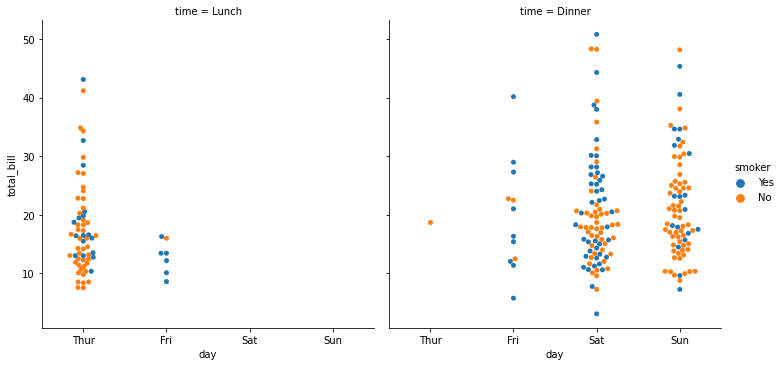

In [19]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

Let's try  **`kind = "box"`** and **`col = day`** to plot all the nested categorical values in time side-y-side. <br>
We can pass in the **`size`** and **`aspect`** parameters as well!

c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hp\.conda\envs\march2021\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


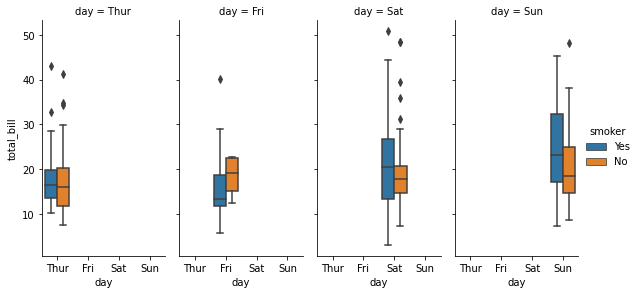

In [20]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box",size=4, aspect=.5)

# Excellent Job!
This section was extensive! We have learned a lot. Let's check our understanding with some exercises. 